In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [38]:
# 그래프에서 선의 종류
linestyles = ['-', '--', ':']

In [39]:
def E( X, g = lambda x: x):
    x_range, f = X
    def integrand ( x ):
        return g( x ) * f ( x )

    return integrate.quad ( integrand, -np.inf, np.inf ) [ 0 ]                     

In [40]:
def V( X, g = lambda x: x):
    x_range, f = X
    mean = E( X, g)
    def integrand ( x ):
        return  (g( x ) - mean )**2 * f (x )
    return integrate.quad ( integrand, -np.inf, np.inf ) [ 0 ]   

In [41]:
def check_prob (X):
    x_range , f= X

    f_min = minimize_scalar( f ).fun
    assert f_min >=0 , ' 확률함수가 마이너스 값을 가짐'
    prob_sum = np.round ( integrate.quad ( f, -np.inf, np.inf) [0],6)
    assert prob_sum == 1, f'확률의 합이 1이 아닌 다음의 값임:{prob_sum}'
    print ( f'expected value {E(X):.3f}')
    print ( f'variance { V(X):.3f}')


In [42]:
def plot_prob( X , x_min, x_max ):
    x_range, f = X
    def F(x):
        return integrate.quad ( f, -np.inf, x) [0]

    xs = np.linspace (x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    ax.plot ( xs, [ f(x) for x in xs],
              label = 'f(x)', color = 'gray')
    ax.plot ( xs, [ F(x) for x in xs],
              label = 'F(x)', ls= '--' , color = 'red')
    
    ax.legend()
    plt.show()

In [43]:
# 카이제곱 분포
#    N개의 변수가 서로 독립이고 N(0,1)을 따르고 있을 때,
#    그 제곱합의 확률분포를 자유도가 N인 카이제곱분포라고 한다.
#    값은 0 이상 실수

n = 10
rv = stats.norm ()

#표준정규분포에서 표본 크기 10만으로 무작위추출한다.
sample_size = int (1e5)
Zs_sample = rv.rvs ( ( n, sample_size))

# axis = 0에서 총합을 구하고, 표준정규분포의 제곱한 표본 데이터를 구한다.
chi2_sample = np.sum ( Zs_sample**2, axis = 0)

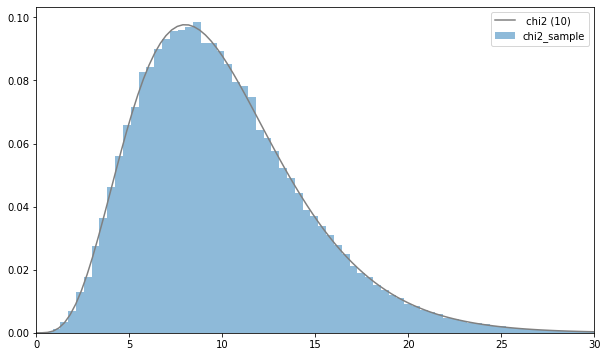

In [44]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    rv_true = stats.chi2 ( n )
    xs = np.linspace ( 0, 30, 100)
    ax.hist ( chi2_sample, bins = 100, density = True,
              alpha = 0.5, label = 'chi2_sample')
    ax.plot ( xs, rv_true.pdf (xs),
                 label = f' chi2 ({ n }) ', color ='gray')
    ax.legend()
    ax.set_xlim( 0, 30)
    plt.show()

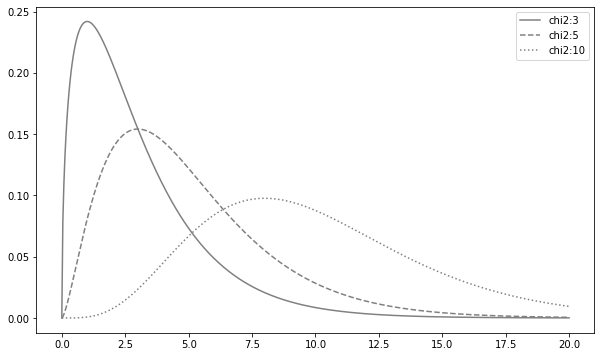

In [45]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace ( 0, 20, 500 )
for n, ls in zip([ 3, 5, 10], linestyles):
    rv = stats.chi2( n )
    ax.plot (xs, rv.pdf (xs),
              label = f'chi2:{ n }', ls=ls, color ='gray')

ax.legend()
plt.show()